# Task for today:

- compute the error between Lagrange interpolation for equispaced points (in "approximate Linfty") and a given function when the degree increases
- compute the error between Lagrange interpolation for Chebyshev (in "approximate Linfty") and a given function when the degree increases
- compute the error between Bernstein approximation (in "approximate Linfty") and a given function when the degree increases
- compute the L2 projection and compute the error ("in approximate Linfty") norm and compare with previous results


In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/lbonaldo/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pi', 'diag', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [50]:
import scipy.special

def lagrange(i, q, x):
    return product([(x-qj)/(q[i]-qj) for qj in q if qj != q[i]], axis=0)

def bernstein(i, q, x):
    n = len(q)-1
    return scipy.special.binom(n,i)*(1-x)**(n-i)*x**i

def cheb(n):
    return numpy.polynomial.chebyshev.chebgauss(n)[0]*.5+.5

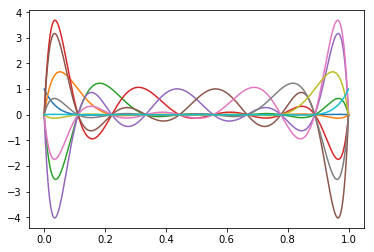

In [51]:
x = linspace(0,1,1025)
q = linspace(0,1,10)
y = array([lagrange(i,q,x) for i in range(len(q))])
_ = plot(x, y.T)

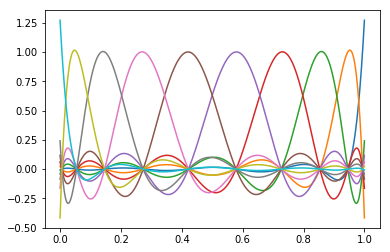

In [52]:
q = cheb(10)
y = array([lagrange(i,q,x) for i in range(len(q))])
_ = plot(x, y.T)

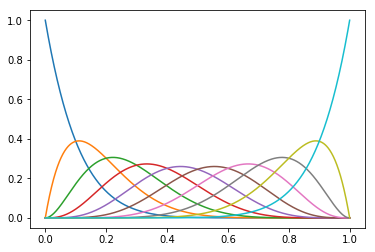

In [53]:
q = linspace(0,1,10)
y = array([bernstein(i,q,x) for i in range(len(q))])
_ = plot(x, y.T)

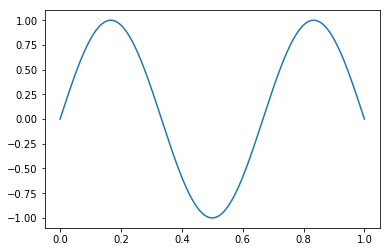

In [54]:
def myfun(x):
    return 1/(1+100*(x-.5)**2)

def myfun(x):
    return sin(3*numpy.pi*x)


plot(x, myfun(x))

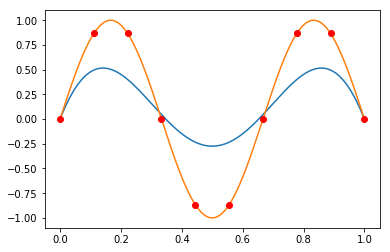

In [55]:
p = y.T.dot(myfun(q))
f = myfun(x)

plot(x,p)
plot(x,f)
plot(q,myfun(q), 'or')

In [56]:
linfty = max(abs(f-p))
linfty

0.72598414958383

In [57]:
def error(q, myfun, interpolation=lagrange) :    
    y = array([interpolation(i,q,x) for i in range(len(q))])
    p = y.T.dot(myfun(q))
    f = myfun(x)
    return (max(abs(f-p)))

In [58]:
N = range(3, 30)
error_equispaced = []
error_cheb = []
error_bernstein = []
for n in N:
    error_cheb.append(error(cheb(n), myfun))
    error_equispaced.append(error(linspace(0,1,n), myfun))
    error_bernstein.append(error(linspace(0,1,n), myfun, bernstein))


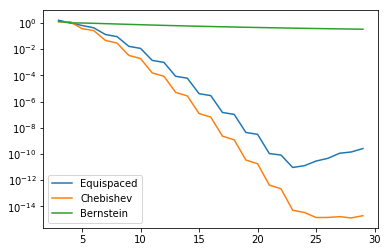

In [59]:
semilogy(N, error_equispaced)
semilogy(N, error_cheb)
semilogy(N, error_bernstein)
_ = legend(['Equispaced','Chebishev','Bernstein'])

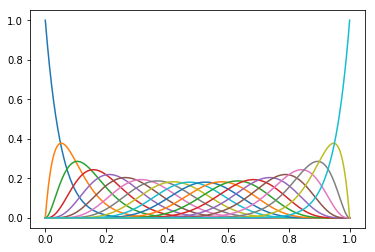

In [60]:
q = linspace(0,1,20)
y = array([bernstein(i,q,x) for i in range(len(q))])
_ = plot(x, y.T)

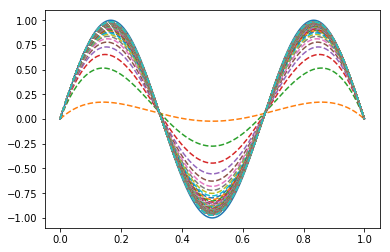

In [61]:
N = range(5,400,5)
plot(x,myfun(x))

for n in N:
    q = linspace(0,1,n)
    y = array([bernstein(i,q,x) for i in range(len(q))])
    p = y.T.dot(myfun(q))
    _ = plot(x, p, '--')


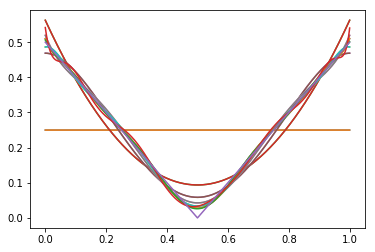

In [62]:
def myfun(x):
    return abs(x-.5)

import scipy
from scipy.integrate import quad as integrate

N = range(1,15)

for n in N:
    M = zeros((n,n))

    for i in range(n):
        for j in range(n):
            M[i,j] = 1.0/(i+j+1)

    F = array([integrate(lambda x: myfun(x)*x**i, 0,1)[0] for i in range(n)])
    pi = linalg.solve(M, F)
    p = sum([x**i*pi[i] for i in range(n)], axis=0)
    plot(x,p)
plot(x,myfun(x))

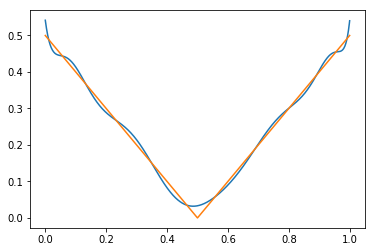

In [63]:
plot(x,p)
plot(x,myfun(x))

In [64]:
max(abs(p-myfun(x)))

0.04173705351430668

Why do we get these errors in the L2 projection? The matrix M is not well conditioned...

In [65]:
linalg.cond(M)

6.111551402921044e+17

Let's turn to numerical quadrature, and Legendre polynomials (for which M is the identity by construction...)

In [66]:
from numpy.polynomial.legendre import leggauss
from numpy.polynomial.legendre import legval
from numpy.polynomial.legendre import Legendre

In [67]:
n = 10
N = n+5 #esatto per polinomial of order 15 at least.In realtà esatta fino 29, 2n-1


q,w = leggauss(N) #i construct quadratyr epoint and weights
w *= .5 #perchè è da -1
q +=1
q /=2

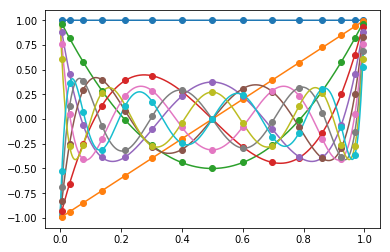

In [68]:
#point evaluation of something and you have to create arrays and to create
#matrix matrix operations or matrix vector. E meglio il primo usando BLAS

v = array([Legendre.basis(i, domain=[0,1])(x) for i in range(n)]) #where I use to integrate
vq = array([Legendre.basis(i, domain=[0,1])(q) for i in range(n)]) #where I use to evaluate
_ = plot(x,v.T)
_ = plot(q, vq.T, 'o') #the points

#sono normalizzati rispetto al valore =1 non rispetto alla L2 norm , saranno quindi 
#ortogonali non ortonormali

Check that we get a diagonal matrix as M:

In [69]:
v.shape, vq.shape #importante per capire se fare trnaspose o no

((10, 1025), (10, 15))

In [70]:
M = einsum('im, jm, m -> ij', vq, vq, w) #einstein summation convention


#INTERPOALATIVE QUADRATIC FORMULA IS EXACT UP TO 28
#SE HAI POLINOMI USATE SEMPRE QUESTA

In [71]:
linalg.cond(M)

18.999999999999893

In [72]:
diag = array([M[i,i] for i in range(n)])

In [73]:
diag

array([1.        , 0.33333333, 0.2       , 0.14285714, 0.11111111,
       0.09090909, 0.07692308, 0.06666667, 0.05882353, 0.05263158])

In [74]:
M

array([[ 1.00000000e+00,  6.24500451e-17,  1.40512602e-15,
         1.21430643e-17,  1.32879818e-15,  2.94902991e-17,
         1.12930498e-15,  6.93889390e-18,  7.97972799e-16,
        -5.89805982e-17],
       [ 6.24500451e-17,  3.33333333e-01, -1.73472348e-18,
         1.39992185e-15,  1.56125113e-17,  1.22818422e-15,
         1.21430643e-17,  9.80118764e-16, -2.94902991e-17,
         6.26235175e-16],
       [ 1.40512602e-15, -1.73472348e-18,  2.00000000e-01,
         2.42861287e-17,  1.29063427e-15,  1.04083409e-17,
         1.01828268e-15, -1.90819582e-17,  7.91033905e-16,
        -3.46944695e-18],
       [ 1.21430643e-17,  1.39992185e-15,  2.42861287e-17,
         1.42857143e-01,  1.21430643e-17,  1.08246745e-15,
        -1.90819582e-17,  8.62157568e-16, -1.04083409e-17,
         6.72205347e-16],
       [ 1.32879818e-15,  1.56125113e-17,  1.29063427e-15,
         1.21430643e-17,  1.11111111e-01, -1.73472348e-17,
         8.76035355e-16, -8.67361738e-18,  7.52869989e-16,
        -8.

In [76]:
M2 = M * (abs(M)>1e-14) #ritorna una matrice con true or false
M2
# se prendo sum di 10 avrò 10 times epsilon lo umenti di 10 times
# moltiplicaton is stable e hanno lo stesso ordine di magnitude cmq rimangono tra 0 e 1 e quindi è stabile
# weigths*something that is smaller than one...tutti e tre sono dello stesso oridne
# il problema è la somma! se scelgo nq grandissimo, non sarà un problema della formula
# se cambio more accurate quadratic formula devo andare a epsilon 13, se vai oltre va peggio
# quindi non è sempre vero che per avere meglio è meglio prendere un numero più grande di 
# quadrative points

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.33333333, -0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        ,  0.        ],
       [ 0.        , -0.        ,  0.2       ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.14285714,  0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.11111111,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.        ,
         0.09090909, -0.        ,  0.        , -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.07692308, -0.        

Now perform the integral

In [25]:
pi = sum(vq*myfun(q)*w, axis=1) #axis=1: summing over all the quadratic points

And plot the function, and its interpolation

In [26]:
p = (pi/diag).dot(v) #lo devo fare perché non è ortonarmale

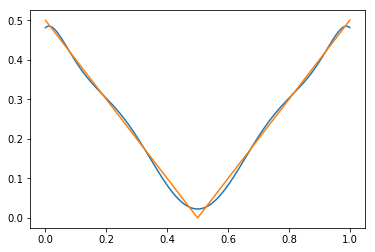

In [27]:
plot(x, p)
_ = plot(x, myfun(x))

In [86]:
basis1 = lambda i,q: Legendre.basis(i, domain=[0,1])(q)
                      
def l2_projection(n, myfun, basis):
    N = n+5
    q,w = leggauss(N) #i construct quadratyr epoint and weights
    w *= .5 #perchè è da -1
    q +=1
    q /=2
    vq = array([basis(i,q) for i in range(n)]) #where I use to evaluate
    M = einsum('im, jm, m -> ij', vq, vq, w)
    F= sum(vq*myfun(q)*w, axis=1)
    p = linalg.solve(M,f)
    return p

In [87]:
n = 10

v1 = array([basis1(i,x) for i in range(n)])
p1 = l2_projection(n, myfun, basis1)

p = p1.dot(v1)
plot(x,p)
_ = plot(x, myfun(x))

ValueError: solve1: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m)->(m) (size 1025 is different from 10)

In [ ]:
n = 10

basis2 = lambda i,x: bernstein(i, linspace(0,1,n),x)

v2 = array([basis2(i,x) for i in range(n)])
p2 = l2_projection(n, myfun, basis2)


#e per vedere la differenza reale devi prendere il condition
#number dei due guys